- pandas is used for data manipulation and loading the dataset.

- nltk is used for natural language processing tasks like stopwords removal and stemming.

- re is used for regular expression-based text manipulation (e.g., removing punctuation).

- stopwords is used to access a list of common words to be removed from text during preprocessing.

- PorterStemmer is used to reduce words to their root form (e.g., "running" becomes "run").

- TfidfVectorizer converts text into numerical features based on term frequency and inverse document frequency.


In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer


Load the email dataset from a CSV file and display the first few rows.

In [ ]:
data = pd.read_csv('combined_data.csv')
print(data.head())

   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...


This line downloads the stopwords dataset from NLTK, which is used to remove common, non-informative words from the text during preprocessing.

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

The `preprocess_text` function cleans the email text by converting it to lowercase, removing punctuation, eliminating stopwords, and applying stemming using the PorterStemmer. The function returns the cleaned text as a single string.

The `apply` function is used to apply `preprocess_text` to each email in the dataset, resulting in a new column, `processed_text`, containing the cleaned text.

Next, the `TfidfVectorizer` is initialized and used to transform the processed text into numerical features based on the term frequency-inverse document frequency (TF-IDF) method. This results in a sparse matrix `X` representing the text data.

The labels (spam or ham) are extracted from the `label` column into the variable `y`.

Finally, the dataset is split into training and testing sets using `train_test_split`, with 80% of the data used for training and 20% for testing, ensuring that the model is trained and evaluated on separate data to prevent overfitting.


In [ ]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    stop_words = set(stopwords.words('english'))
    words = [PorterStemmer().stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

data['processed_text'] = data['text'].apply(preprocess_text)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Matplotlib.pyplot is a widely used library for creating static, animated, and interactive visualizations in Python.
- It provides tools to generate various types of plots and charts, such as bar charts, histograms, and line graphs.

- WordCloud is a module used to generate word clouds, which visually represent the frequency of words in a text.
- The more frequently a word appears, the larger it appears in the word cloud.


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

 Prints the number of spam and ham emails and visualizes the distribution with a bar chart.


Number of Spam Emails: 43910
Number of Ham Emails: 39538


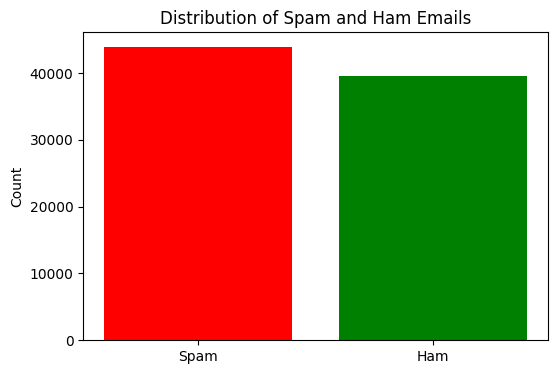

In [ ]:
# 1. Visualizing the distribution of spam vs non-spam emails
spam_count = data[data['label'] == 1].shape[0]
ham_count = data[data['label'] == 0].shape[0]

# Print the values for reference
print(f"Number of Spam Emails: {spam_count}")
print(f"Number of Ham Emails: {ham_count}")

plt.figure(figsize=(6, 4))
plt.bar(['Spam', 'Ham'], [spam_count, ham_count], color=['red', 'green'])
plt.title('Distribution of Spam and Ham Emails')
plt.ylabel('Count')
plt.show()


In [ ]:
from collections import Counter

Prints the 10 most frequent words in the dataset and generates a word cloud visualization.

10 Most Frequent Words in the Dataset:
[('escapenumber', 1145384), ('the', 720606), ('to', 478474), ('and', 355690), ('of', 337122), ('a', 315312), ('in', 246197), ('escapelong', 227261), ('you', 195104), ('for', 191310)]


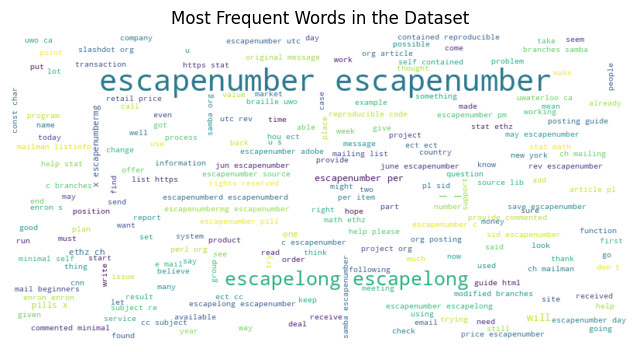

In [ ]:
all_text = ' '.join(data['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

words = re.findall(r'\w+', all_text.lower())
word_freq = Counter(words)
print("10 Most Frequent Words in the Dataset:")
print(word_freq.most_common(10))

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in the Dataset')
plt.show()


Prints  statistics about email lengths (average, max, and min) and visualizes the email length distribution.

Average email length (words): 282.81
Maximum email length (words): 101984
Minimum email length (words): 1


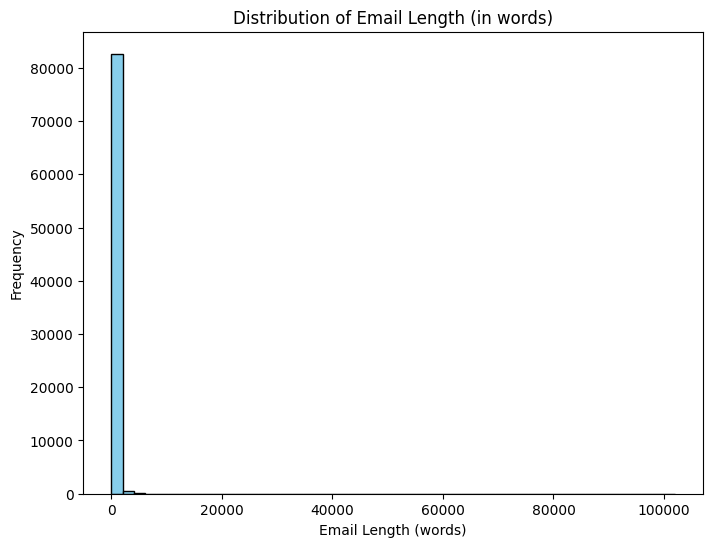

In [ ]:
data['email_length'] = data['text'].apply(lambda x: len(x.split()))

# Print basic statistics of email lengths
print(f"Average email length (words): {data['email_length'].mean():.2f}")
print(f"Maximum email length (words): {data['email_length'].max()}")
print(f"Minimum email length (words): {data['email_length'].min()}")

plt.figure(figsize=(8, 6))
plt.hist(data['email_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Email Length (in words)')
plt.xlabel('Email Length (words)')
plt.ylabel('Frequency')
plt.show()


- TfidfVectorizer is a feature extraction method from scikit-learn used to convert text data into numerical format.
- It transforms text into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features,
- Which reflects the importance of words in a document relative to the entire dataset.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

 Prints the top 20 words based on their TF-IDF scores and visualizes them using a bar chart.

Top 20 Words Based on TF-IDF and their Scores:
com: 8045.3461
compani: 2999.1566
ect: 2443.6359
enron: 4405.2655
escapelong: 4672.7864
escapenumb: 31471.1428
get: 6013.5279
help: 4685.0421
http: 9123.5914
list: 4364.0107
mail: 4560.7504
may: 4136.6814
new: 4400.6815
one: 5792.4009
org: 3902.4714
pleas: 7076.0620
price: 5783.4112
time: 5470.9157
use: 5546.8925
www: 5002.7734


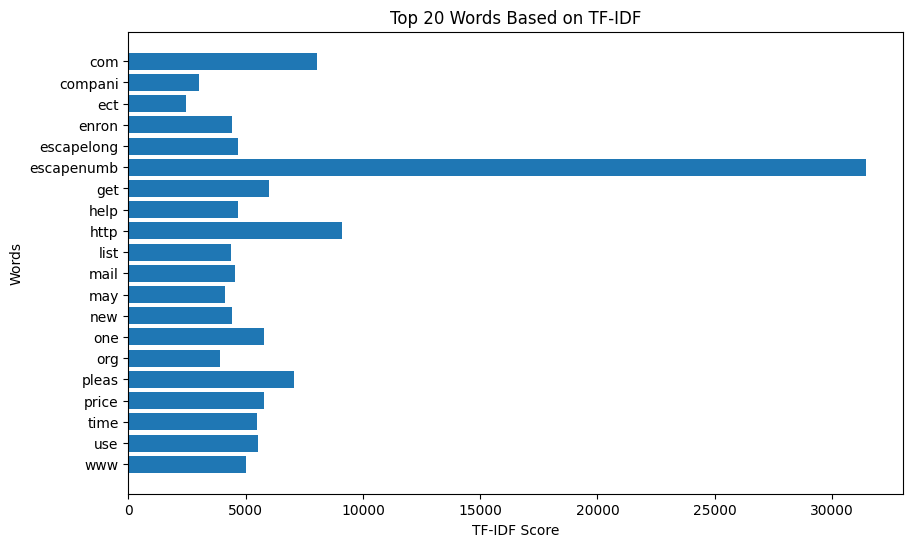

In [ ]:

vectorizer = TfidfVectorizer(max_features=20)  # Get the top 20 words
X = vectorizer.fit_transform(data['processed_text'])
top_words = vectorizer.get_feature_names_out()

# Print the TF-IDF values for the top words
print("Top 20 Words Based on TF-IDF and their Scores:")
word_scores = X.sum(axis=0).A1
for word, score in zip(top_words, word_scores):
    print(f"{word}: {score:.4f}")

# Visualizing the top words
plt.figure(figsize=(10, 6))
plt.barh(top_words, word_scores)
plt.title('Top 20 Words Based on TF-IDF')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.gca().invert_yaxis()
plt.show()


# Importing classification models and evaluation metrics

- LogisticRegression: A linear model used for binary classification tasks. It estimates the probability of a class using a logistic function.
- MultinomialNB: A probabilistic model based on Bayes' theorem, ideal for text classification tasks. It assumes independence between features and is commonly used for spam detection.
- SVC (Support Vector Classification): A classification model that finds the optimal hyperplane to separate data points, useful for handling high-dimensional datasets like text data.
  
# Importing evaluation metrics to assess model performance
- accuracy_score: Measures the overall accuracy of the model by calculating the ratio of correct predictions.
- precision_score: Calculates the proportion of true positive predictions out of all positive predictions, helping to minimize false positives.
- recall_score: Measures the proportion of true positive predictions out of all actual positive cases, ensuring that most spam emails are identified.
- f1_score: The harmonic mean of precision and recall, providing a balanced measure of performance when both precision and recall are important.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initializing the models
- logreg = LogisticRegression(): Initializes the Logistic Regression model for binary classification.
- naive_bayes = MultinomialNB(): Initializes the Naive Bayes model, suitable for text classification tasks like spam detection.
- svm = SVC(): Initializes the Support Vector Machine model, which is effective for high-dimensional data.

# Training the models
- logreg.fit(X_train, y_train): Trains the Logistic Regression model using the training data (X_train) and corresponding labels (y_train).
- naive_bayes.fit(X_train, y_train): Trains the Naive Bayes model on the same training data.
- svm.fit(X_train, y_train): Trains the Support Vector Machine model on the training data.

# Making predictions on the test set
- logreg_preds = logreg.predict(X_test): Makes predictions using the trained Logistic Regression model on the test data (X_test).
- nb_preds = naive_bayes.predict(X_test): Makes predictions using the trained Naive Bayes model on the test data.
- svm_preds = svm.predict(X_test): Makes predictions using the trained Support Vector Machine model on the test data.


In [ ]:
# Initialize models
logreg = LogisticRegression()
naive_bayes = MultinomialNB()
svm = SVC()

# Train models
logreg.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict on test set
logreg_preds = logreg.predict(X_test)
nb_preds = naive_bayes.predict(X_test)
svm_preds = svm.predict(X_test)


# Function to calculate and print evaluation metrics
- evaluate_model(name, predictions, y_test): A function that takes the model's name, predicted values, and the actual test labels,
  and calculates the following evaluation metrics:
    - accuracy: Measures the overall correctness of the model.
    - precision: Measures the proportion of true positives out of all positive predictions.
    - recall: Measures the proportion of true positives out of all actual positive cases.
    - f1 score: The harmonic mean of precision and recall, providing a balance between the two.

# Evaluating each model on the test set
- evaluate_model("Logistic Regression", logreg_preds, y_test): Evaluates the performance of the Logistic Regression model.
- evaluate_model("Naive Bayes", nb_preds, y_test): Evaluates the performance of the Naive Bayes model.
- evaluate_model("Support Vector Machine", svm_preds, y_test): Evaluates the performance of the Support Vector Machine model.


In [ ]:
# Function to calculate and print metrics
def evaluate_model(name, predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

evaluate_model("Logistic Regression", logreg_preds, y_test)
evaluate_model("Naive Bayes", nb_preds, y_test)
evaluate_model("Support Vector Machine", svm_preds, y_test)


Logistic Regression Performance:
Accuracy: 0.9655
Precision: 0.9474
Recall: 0.9895
F1 Score: 0.9680

Naive Bayes Performance:
Accuracy: 0.9630
Precision: 0.9716
Recall: 0.9579
F1 Score: 0.9647

Support Vector Machine Performance:
Accuracy: 0.9747
Precision: 0.9584
Recall: 0.9953
F1 Score: 0.9765



In [ ]:
!pip install joblib

# Importing necessary libraries for saving models and vectorizers
- joblib: A library used for serializing (saving) and deserializing (loading) Python objects, including machine learning models and transformers.
  It helps to store trained models and vectorizers for later use without retraining them.

# Importing TfidfVectorizer for text feature extraction
- TfidfVectorizer: A method from scikit-learn that transforms text data into numerical features based on Term Frequency-Inverse Document Frequency (TF-IDF).
  It helps to convert raw text into vectors of numeric values that can be used for machine learning models.


In [ ]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Saving the trained models to disk using joblib
- joblib.dump(logreg, 'logreg_model.pkl'): Saves the trained Logistic Regression model to a file named 'logreg_model.pkl'.
- joblib.dump(naive_bayes, 'naive_bayes_model.pkl'): Saves the trained Naive Bayes model to a file named 'naive_bayes_model.pkl'.
- joblib.dump(svm, 'svm_model.pkl'): Saves the trained Support Vector Machine model to a file named 'svm_model.pkl'.

# These saved models can be reloaded later for predictions without needing to retrain them.


In [ ]:
# Save each model to a file
joblib.dump(logreg, 'logreg_model.pkl')
joblib.dump(naive_bayes, 'naive_bayes_model.pkl')
joblib.dump(svm, 'svm_model.pkl')


['svm_model.pkl']

# Initializing and transforming the text data using TF-IDF Vectorizer
- vectorizer = TfidfVectorizer(): Initializes a TF-IDF Vectorizer, which converts the processed text data into numerical features based on Term Frequency-Inverse Document Frequency (TF-IDF).
- X = vectorizer.fit_transform(data['processed_text']): Applies the TF-IDF Vectorizer to the preprocessed text data and transforms it into a sparse matrix of numerical features.

# Saving the TF-IDF vectorizer to a file
- joblib.dump(vectorizer, 'tfidf_vectorizer.pkl'): Saves the trained TF-IDF Vectorizer to a file named 'tfidf_vectorizer.pkl' for future use, allowing it to transform new text data without retraining.


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])

joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

# Loading previously saved models and vectorizer using joblib
- logreg_model = joblib.load('logreg_model.pkl'): Loads the saved Logistic Regression model from the file 'logreg_model.pkl'.
- naive_bayes_model = joblib.load('naive_bayes_model.pkl'): Loads the saved Naive Bayes model from the file 'naive_bayes_model.pkl'.
- svm_model = joblib.load('svm_model.pkl'): Loads the saved Support Vector Machine model from the file 'svm_model.pkl'.
- vectorizer = joblib.load('tfidf_vectorizer.pkl'): Loads the saved TF-IDF vectorizer from the file 'tfidf_vectorizer.pkl', which will be used to transform new text data into numerical features.


In [ ]:
logreg_model=joblib.load('logreg_model.pkl')
naive_bayes_model=joblib.load('naive_bayes_model.pkl')
svm_model=joblib.load('svm_model.pkl')
vectorizer=joblib.load('tfidf_vectorizer.pkl')

# Preprocessing and predicting email classification

- preprocess_text(text): A function to clean the email text by:
  - Converting the text to lowercase.
  - Removing punctuation using regular expressions.
  - Removing stopwords (common, non-informative words).
  - Stemming words to their root form using the PorterStemmer.

- predict_email(text): A function to predict whether an email is spam or ham by:
  - Preprocessing the input email text using the `preprocess_text` function.
  - Vectorizing the cleaned text using the previously saved TF-IDF vectorizer.
  - Making a prediction using the trained model (Logistic Regression, Naive Bayes, or SVM).

- new_email: A sample email text provided for classification, which mentions winning a prize.

- result = predict_email(new_email): Classifies the email as either "Spam" or "Ham" based on the model’s prediction.
  - If the prediction is 1, it classifies the email as "Spam".
  - If the prediction is 0, it classifies the email as "Ham".



In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

def predict_email(text):
    # Preprocess the text
    processed_text = preprocess_text(text)
    # Vectorize the text
    vectorized_text = vectorizer.transform([processed_text])  # transform needs array
    # Predict using the trained model
    prediction = model.predict(vectorized_text)
    return "Spam" if prediction[0] == 1 else "Ham"

new_email = """
Hello,

You've been selected as the lucky winner of a brand new iPhone 12! Click here to claim your prize before the offer expires: [Link]

Don't miss out on this exclusive opportunity!

Best regards,
Prize Committee
"""
result = predict_email(new_email)
print(f"The email is classified as: {result}")


The email is classified as: Spam


# Example ham and spam emails for testing and evaluation

- ham_emails: A list of sample legitimate emails (ham), representing common email content like meeting reminders, personal messages, and customer service updates.
- spam_emails: A list of sample spam emails, including phishing attempts, fraudulent investment opportunities, and lottery scams.

# Labels for classification
- labels: A list of labels representing the classification of the emails:
  - 0 for ham (legitimate) emails.
  - 1 for spam emails.
  
# Combining the emails into a single dataset for testing
- test_emails: Combines the ham and spam emails into one list to be used for model evaluation or prediction.


In [ ]:
# Example ham and spam emails
ham_emails = [
    """Hi Team, Just a reminder that we will be having our weekly sync tomorrow at 10 AM in the main conference room. Please be prepared to discuss your progress on current projects and any roadblocks you're facing. Best regards, [Your Name]""",
    """Hey! Are we still on for the hike this Saturday? Let’s aim to meet at the trailhead by 8 AM to avoid the crowd. Also, could you bring the extra water bottles? Let me know! Cheers, Ali""",
    """Hello [Customer Name], We're excited to let you know that your order (Order ID: 123456) has been shipped and is on its way to you! You can track your package using this tracking number: XYZ123456789. Thank you for shopping with us. Best regards, [Your Company Name] Customer Support""",
    """Dear [Patient Name], This is a friendly reminder from [Dentist's Office Name] about your upcoming dental appointment on [Date] at [Time]. Please arrive 10 minutes early to complete any necessary paperwork. If you need to reschedule, please contact us at least 24 hours in advance. Thank you, [Receptionist Name]"""
]

spam_emails = [
    """Hello, You've been selected as the lucky winner of a brand new iPhone 12! Click here to claim your prize before the offer expires: [Link] Don't miss out on this exclusive opportunity! Best regards, Prize Committee""",
    """Dear Valued Customer, We have detected unusual activity in your account and need to verify your identity. Please log in immediately using the following link to prevent your account from being suspended: [Phishing Link] Thank you, Customer Service""",
    """Invest in the fast-growing industry of cryptocurrency with guaranteed returns. Our new investment plan offers a 100% return on your investment within a month. Secure your spot now by clicking on this link: [Link] Act fast, limited spots available!""",
    """Congratulations! You have won $2,500,000 in the National Lottery. To claim your prize, please provide your bank details and a processing fee of $200. Contact us immediately at [Contact Info]. This is a once-in-a-lifetime opportunity! Best, Lottery Coordinator"""
]

# Labels for ham (0) and spam (1)
labels = [0] * len(ham_emails) + [1] * len(spam_emails)

# Combine the emails into one dataset
test_emails = ham_emails + spam_emails


# Preprocessing and vectorizing the test emails for prediction

- processed_test_emails: A list comprehension that applies the `preprocess_text` function to each email in the `test_emails` dataset.
  - This step cleans the email text by converting it to lowercase, removing punctuation, stopwords, and applying stemming.

- test_features: Transforms the preprocessed emails into numerical features using the previously saved TF-IDF vectorizer.
  - This step converts the cleaned text data into a format (sparse matrix) that can be used by machine learning models for prediction.


In [ ]:
processed_test_emails = [preprocess_text(email) for email in test_emails]
test_features = vectorizer.transform(processed_test_emails)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate model performance
- evaluate_model(model, test_features, labels, model_name="Model"):
  - A function that takes a trained model, the test features, true labels, and the model name.
  - It makes predictions using the model and calculates the following evaluation metrics:
    - accuracy: Measures the overall correctness of the model.
    - precision: Proportion of true positive predictions among all positive predictions.
    - recall: Proportion of true positive predictions among all actual positive cases.
    - f1 score: Harmonic mean of precision and recall, providing a balanced performance metric.
    - confusion_matrix: Shows the number of true positives, false positives, true negatives, and false negatives.

# Evaluating each model on the test set
- evaluate_model(logreg_model, test_features, labels, "Logistic Regression"):
  - Evaluates the performance of the Logistic Regression model using the test data.
- evaluate_model(naive_bayes_model, test_features, labels, "Naive Bayes"):
  - Evaluates the performance of the Naive Bayes model using the test data.
- evaluate_model(svm_model, test_features, labels, "SVM"):
  - Evaluates the performance of the Support Vector Machine model using the test data.


In [ ]:

def evaluate_model(model, test_features, labels, model_name="Model"):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    conf_matrix = confusion_matrix(labels, predictions)

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.5f}")
    print(f"Precision: {precision:.5f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")

# Evaluate each of your models
evaluate_model(logreg_model, test_features, labels, "Logistic Regression")
evaluate_model(naive_bayes_model, test_features, labels, "Naive Bayes")
evaluate_model(svm_model, test_features, labels, "SVM")


Logistic Regression Performance:
Accuracy: 0.75000
Precision: 0.66667
Recall: 1.0000
F1 Score: 0.8000
Confusion Matrix:
[[2 2]
 [0 4]]


Naive Bayes Performance:
Accuracy: 0.62500
Precision: 0.57143
Recall: 1.0000
F1 Score: 0.7273
Confusion Matrix:
[[1 3]
 [0 4]]


SVM Performance:
Accuracy: 0.75000
Precision: 0.66667
Recall: 1.0000
F1 Score: 0.8000
Confusion Matrix:
[[2 2]
 [0 4]]




In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
- plot_confusion_matrix(y_true, y_pred, title): A function that takes the true labels (`y_true`), predicted labels (`y_pred`), and a title to display the confusion matrix as a heatmap.
  - The confusion matrix is calculated using `confusion_matrix(y_true, y_pred)`.
  - A heatmap is generated using `sns.heatmap` with annotations and formatted as integers (using `fmt='d'`).
  - The plot is displayed using `plt.show()`.

# Example usage
- plot_confusion_matrix(y_test, logreg_preds, 'Confusion Matrix for Logistic Regression'):
  - Ca

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Example usage:
plot_confusion_matrix(y_test, logreg_preds, 'Confusion Matrix for Logistic Regression')


NameError: name 'y_test' is not defined

# Importing necessary functions for ROC curve plotting
- roc_curve from sklearn.metrics: A function that computes the Receiver Operating Characteristic (ROC) curve, showing the performance of a classification model.
- auc from sklearn.metrics: A function that computes the Area Under the Curve (AUC) for the ROC curve, providing a single value to evaluate the model’s ability to distinguish between classes.

In [ ]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
- plot_roc_curve(y_true, y_scores, title): A function that plots the ROC curve for a classification model.
  - `fpr` (False Positive Rate) and `tpr` (True Positive Rate) are calculated using `roc_curve(y_true, y_scores)`.
  - `roc_auc` is computed using `auc(fpr, tpr)`, representing the area under the ROC curve.
  - The ROC curve is plotted with `fpr` on the x-axis and `tpr` on the y-axis, with a diagonal line representing random guessing.
  - The curve is displayed with a legend showing the AUC value.

# Example usage
- y_scores = logreg.decision_function(X_test): Computes the decision function (raw scores) for the Logistic Regression model on the test data.
- plot_roc_curve(y_test, y_scores, 'ROC Curve for Logistic Regression'):
  - C

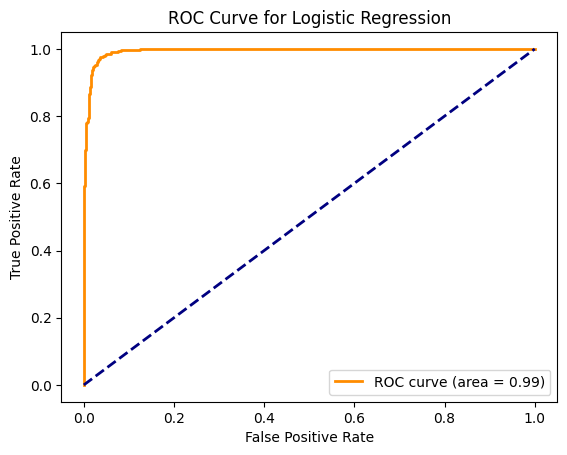

In [ ]:
def plot_roc_curve(y_true, y_scores, title):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

y_scores = logreg.decision_function(X_test)
plot_roc_curve(y_test, y_scores, 'ROC Curve for Logistic Regression')


- pd.Series: A function from pandas that creates a Series object, used here to associate feature names with their corresponding coefficients.
- plt: A module from matplotlib used to create visualizations such as bar plots.

- plot_feature_importance(coefs, feature_names, title): A function that plots the feature importance for a model based on its coefficients.
  - `coefs`: The model coefficients that represent the importance of each feature.
  - `feature_names`: A list of feature names corresponding to the coefficients.
  - The coefficients are converted into a pandas Series for easier sorting and visualization.
  - The coefficients are sorted in ascending order and plotted as a horizontal bar chart using `plot(kind='barh')`.
  - The plot is displayed with a title passed as an argument.


In [ ]:
def plot_feature_importance(coefs, feature_names, title):
    coefs = pd.Series(coefs, index=feature_names)
    sorted_coefs = coefs.sort_values()
    sorted_coefs.plot(kind='barh', figsize=(6, 6))
    plt.title(title)
    plt.show()


plot_feature_importance(logreg.coef_[0], vectorizer.get_feature_names_out(), 'Feature Importance for Logistic Regression')


NameError: name 'logreg' is not defined